In [1]:
from histimator.models import HistiModel, HistiChannel, HistiSample
from histimator.estimator import BinnedLH

In [2]:
from iminuit import Minuit, describe
import numpy as np

In [3]:
hist_sig = np.asarray([1,2,3,4])
hist_bkg = np.asarray([5,5,5,5])

In [4]:
m = HistiModel('model')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)

In [5]:
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [6]:
print describe(background.pdf)

['x', 'BackgroundNorm']


In [7]:
print background.bincontent
assess = []
for i in range(len(background.binedges)):
    assess.append(background.pdf(i,1))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0, 0.0]


In [8]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

In [9]:
data = hist_sig*2 +hist_bkg

chan.SetData(data)
m.AddChannel(chan)

funcpos [array([0, 1]), array([0, 2])]


In [10]:
blh = BinnedLH(m, bound=(0,4))

In [11]:
params = m.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'SigXSecOverSM': 1.0, 'limit_BackgroundNorm': (0, 100), 'errordef': 1}


In [12]:
minimiser = Minuit(blh, **params)

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


In [13]:
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

FCN = 7.26387865589 
 TOTAL NCALL = 43 
 NCALLS = 43 
 
 
 EDM = 2.93583670878e-09 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39966,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.979534,0,0,0.0,100.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99991,2.39931,0,0,0.0,3.0,
2,BackgroundNorm,1.00003,0.978879,0,0,0.0,100.0,


+,SigXSecOverSM,BackgroundNorm
SigXSecOverSM,1.00,-0.90
BackgroundNorm,-0.90,1.00


Error,-1.98618852268,1.00009089428
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


Error,-0.756705600149,1.08484147103
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0848414710272252, 'lower': -0.756705600148597, 'at_lower_limit': False, 'min': 1.000028393191904, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 82},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 1.0000908942838587, 'lower': -1.9861885226766014, 'at_lower_limit': False, 'min': 1.9999091057161413, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 52}}

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/iminuit/_plotting.py:51: RuntimeWarning: band and text is requested but the bound is too narrow.
  warnings.warn(RuntimeWarning('band and text is requested but'


(array([-2.79871089, -2.70176907, -2.60482725, -2.50788544, -2.41094362,
        -2.3140018 , -2.21705998, -2.12011816, -2.02317635, -1.92623453,
        -1.82929271, -1.73235089, -1.63540907, -1.53846726, -1.44152544,
        -1.34458362, -1.2476418 , -1.15069998, -1.05375816, -0.95681635,
        -0.85987453, -0.76293271, -0.66599089, -0.56904907, -0.47210726,
        -0.37516544, -0.27822362, -0.1812818 , -0.08433998,  0.01260183,
         0.10954365,  0.20648547,  0.30342729,  0.40036911,  0.49731092,
         0.59425274,  0.69119456,  0.78813638,  0.8850782 ,  0.98202002,
         1.07896183,  1.17590365,  1.27284547,  1.36978729,  1.46672911,
         1.56367092,  1.66061274,  1.75755456,  1.85449638,  1.9514382 ,
         2.04838001,  2.14532183,  2.24226365,  2.33920547,  2.43614729,
         2.53308911,  2.63003092,  2.72697274,  2.82391456,  2.92085638,
         3.0177982 ,  3.11474001,  3.21168183,  3.30862365,  3.40556547,
         3.50250729,  3.5994491 ,  3.69639092,  3.7

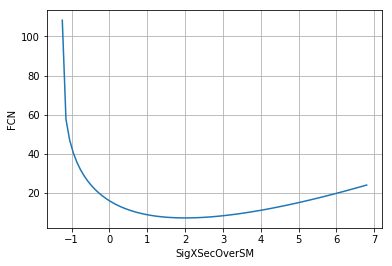

In [14]:
%matplotlib inline
minimiser.draw_profile('SigXSecOverSM')

## Testing PDF

In [15]:
m2 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)

In [16]:
background.AddOverallSys("NormSystUncertainty",.9,1.1)

In [17]:
from iminuit import describe
describe(background.pdf)

['x', 'BackgroundNorm', 'NormSystUncertainty']

In [18]:
print background.bincontent
assess = []
for i in range(len(background.bincontent)):
    assess.append(background.pdf(i,1,0))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0]


In [19]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m2.AddChannel(chan)

funcpos [array([0, 1]), array([0, 2, 3])]


In [20]:
blh = BinnedLH(m2, bound=(0,4))
params = m2.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.20000000000000007, 'SigXSecOverSM': 1.0, 'errordef': 1, 'limit_NormSystUncertainty': (-50, 50), 'limit_BackgroundNorm': (0, 100)}


In [21]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter NormSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 7.86495690075 
 TOTAL NCALL = 73 
 NCALLS = 73 
 
 
 EDM = 2.0545651524e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.0028,2.40131,0,0,0.0,3.0,
2,BackgroundNorm,0.999502,1.00232,0,0,0.0,100.0,
3,NormSystUncertainty,0.00652159,2.23892,0,0,-50.0,50.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.0028,2.40016,0,0,0.0,3.0,
2,BackgroundNorm,0.999502,1.0003,0,0,0.0,100.0,
3,NormSystUncertainty,0.00652159,2.23921,0,0,-50.0,50.0,


+,SigXSecOverSM,BackgroundNorm,NormSystUncertainty
SigXSecOverSM,1.00,-0.88,0.00
BackgroundNorm,-0.88,1.00,-0.21
NormSystUncertainty,0.00,-0.21,1.00


Error,-1.98908889011,0.997199195173
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


Error,-0.759491762141,1.00231579554
Valid,True,False
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-2.23891913381,2.23891913381
Valid,False,False
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0023157955427826, 'lower': -0.7594917621412193, 'at_lower_limit': False, 'min': 0.9995017248687732, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': False, 'at_upper_max_fcn': False, 'nfcn': 470},
 'NormSystUncertainty': {'lower_new_min': False, 'upper': 2.238919133813347, 'lower': -2.238919133813347, 'at_lower_limit': False, 'min': 0.006521591617037359, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': False, 'at_upper_max_fcn': False, 'nfcn': 863},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 0.9971991951725534, 'lower': -1.9890888901072705, 'at_lower_limit': False, 'min': 2.0028008048274466, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 12

(array([-2.7975228 , -2.70054656, -2.60357033, -2.5065941 , -2.40961786,
        -2.31264163, -2.21566539, -2.11868916, -2.02171292, -1.92473669,
        -1.82776046, -1.73078422, -1.63380799, -1.53683175, -1.43985552,
        -1.34287928, -1.24590305, -1.14892681, -1.05195058, -0.95497435,
        -0.85799811, -0.76102188, -0.66404564, -0.56706941, -0.47009317,
        -0.37311694, -0.2761407 , -0.17916447, -0.08218824,  0.014788  ,
         0.11176423,  0.20874047,  0.3057167 ,  0.40269294,  0.49966917,
         0.59664541,  0.69362164,  0.79059787,  0.88757411,  0.98455034,
         1.08152658,  1.17850281,  1.27547905,  1.37245528,  1.46943152,
         1.56640775,  1.66338398,  1.76036022,  1.85733645,  1.95431269,
         2.05128892,  2.14826516,  2.24524139,  2.34221763,  2.43919386,
         2.53617009,  2.63314633,  2.73012256,  2.8270988 ,  2.92407503,
         3.02105127,  3.1180275 ,  3.21500374,  3.31197997,  3.4089562 ,
         3.50593244,  3.60290867,  3.69988491,  3.7

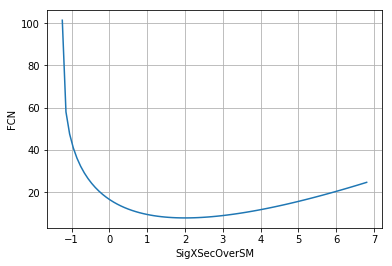

In [22]:
minimiser.draw_profile('SigXSecOverSM')

# Testing HistoSys

In [23]:
m3 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = [0,1,2,3,4]
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
background.AddNorm("BackgroundNorm",1.,0,100)
background.AddOverallSys("NormSystUncertainty",.9,1.1)

In [24]:
h_up = [5.1,5.2,5.3,5.6]
h_down = [4.9,4.8,4.7,4.4]
background.AddHistoSys("HistoSystUncertainty",h_down,h_up)

In [25]:
from iminuit import describe
describe(background.pdf)

['x', 'BackgroundNorm', 'NormSystUncertainty', 'HistoSystUncertainty']

In [26]:
print background.bincontent
assess = []
for i in range(len(background.bincontent)):
    assess.append(background.pdf(i,1.,0.,0.))
print assess

[5 5 5 5]
[5.0, 5.0, 5.0, 5.0]


In [27]:
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m3.AddChannel(chan)

funcpos [array([0, 1]), array([0, 2, 3, 4])]


In [28]:
blh = BinnedLH(m3, bound=(0,4))
params = m3.Parameters()
print "params are ",params

params are  {'BackgroundNorm': 1.0, 'limit_SigXSecOverSM': (0, 3), 'NormSystUncertainty': 0.20000000000000007, 'SigXSecOverSM': 1.0, 'limit_HistoSystUncertainty': (-50, 50), 'HistoSystUncertainty': 2.4000000000000057, 'errordef': 1, 'limit_NormSystUncertainty': (-50, 50), 'limit_BackgroundNorm': (0, 100)}


In [29]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter BackgroundNorm is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter NormSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter HistoSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 8.10472382021 
 TOTAL NCALL = 165 
 NCALLS = 165 
 
 
 EDM = 1.11840235764e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00033,2.42068,0,0,0.0,3.0,
2,BackgroundNorm,0.999854,1.03447,0,0,0.0,100.0,
3,NormSystUncertainty,0.000173323,3.42593,0,0,-50.0,50.0,
4,HistoSystUncertainty,0.00108053,3.56007,0,0,-50.0,50.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,2.00033,2.42023,0,0,0.0,3.0,
2,BackgroundNorm,0.999854,1.03394,0,0,0.0,100.0,
3,NormSystUncertainty,0.000173323,3.42707,0,0,-50.0,50.0,
4,HistoSystUncertainty,0.00108053,3.55986,0,0,-50.0,50.0,


+,SigXSecOverSM,BackgroundNorm,NormSystUncertainty,HistoSystUncertainty
SigXSecOverSM,1.00,-0.83,0.00,0.28
BackgroundNorm,-0.83,1.00,-0.32,-0.06
NormSystUncertainty,0.00,-0.32,1.00,-0.00
HistoSystUncertainty,0.28,-0.06,-0.00,1.00


Error,-2.00033232923,0.999667670774
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


Error,-1.03447006542,1.03447006542
Valid,False,False
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-50.0001733232,49.9998266768
Valid,True,True
At Limit,True,True
Max FCN,False,False
New Min,False,False


Error,-11.2199187462,49.9989194671
Valid,True,True
At Limit,False,True
Max FCN,False,False
New Min,False,False


{'BackgroundNorm': {'lower_new_min': False, 'upper': 1.0344700654196293, 'lower': -1.0344700654196293, 'at_lower_limit': False, 'min': 0.9998542611974026, 'at_lower_max_fcn': False, 'is_valid': False, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': False, 'upper_valid': False, 'at_upper_max_fcn': False, 'nfcn': 1707},
 'HistoSystUncertainty': {'lower_new_min': False, 'upper': 49.998919467062755, 'lower': -11.219918746206577, 'at_lower_limit': False, 'min': 0.0010805329372445271, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 612},
 'NormSystUncertainty': {'lower_new_min': False, 'upper': 49.999826676774674, 'lower': -50.000173323225326, 'at_lower_limit': True, 'min': 0.00017332322532581657, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': True, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False,

(array([-7.11862968, -6.97479715, -6.83096462, -6.68713209, -6.54329956,
        -6.39946703, -6.2556345 , -6.11180198, -5.96796945, -5.82413692,
        -5.68030439, -5.53647186, -5.39263933, -5.2488068 , -5.10497427,
        -4.96114174, -4.81730921, -4.67347668, -4.52964415, -4.38581162,
        -4.24197909, -4.09814656, -3.95431403, -3.8104815 , -3.66664897,
        -3.52281644, -3.37898391, -3.23515138, -3.09131885, -2.94748632,
        -2.80365379, -2.65982126, -2.51598874, -2.37215621, -2.22832368,
        -2.08449115, -1.94065862, -1.79682609, -1.65299356, -1.50916103,
        -1.3653285 , -1.22149597, -1.07766344, -0.93383091, -0.78999838,
        -0.64616585, -0.50233332, -0.35850079, -0.21466826, -0.07083573,
         0.0729968 ,  0.21682933,  0.36066186,  0.50449439,  0.64832692,
         0.79215945,  0.93599198,  1.0798245 ,  1.22365703,  1.36748956,
         1.51132209,  1.65515462,  1.79898715,  1.94281968,  2.08665221,
         2.23048474,  2.37431727,  2.5181498 ,  2.6

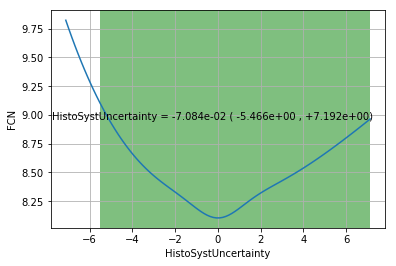

In [30]:
minimiser.draw_profile('HistoSystUncertainty')

(array([-6.85396508, -6.71549763, -6.57703019, -6.43856275, -6.30009531,
        -6.16162786, -6.02316042, -5.88469298, -5.74622554, -5.60775809,
        -5.46929065, -5.33082321, -5.19235577, -5.05388833, -4.91542088,
        -4.77695344, -4.638486  , -4.50001856, -4.36155111, -4.22308367,
        -4.08461623, -3.94614879, -3.80768134, -3.6692139 , -3.53074646,
        -3.39227902, -3.25381157, -3.11534413, -2.97687669, -2.83840925,
        -2.6999418 , -2.56147436, -2.42300692, -2.28453948, -2.14607203,
        -2.00760459, -1.86913715, -1.73066971, -1.59220226, -1.45373482,
        -1.31526738, -1.17679994, -1.03833249, -0.89986505, -0.76139761,
        -0.62293017, -0.48446273, -0.34599528, -0.20752784, -0.0690604 ,
         0.06940704,  0.20787449,  0.34634193,  0.48480937,  0.62327681,
         0.76174426,  0.9002117 ,  1.03867914,  1.17714658,  1.31561403,
         1.45408147,  1.59254891,  1.73101635,  1.8694838 ,  2.00795124,
         2.14641868,  2.28488612,  2.42335357,  2.5

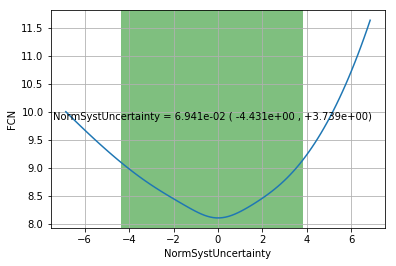

In [31]:
minimiser.draw_profile('NormSystUncertainty')

(array([-1.06802736, -1.02625198, -0.98447659, -0.9427012 , -0.90092582,
        -0.85915043, -0.81737505, -0.77559966, -0.73382427, -0.69204889,
        -0.6502735 , -0.60849811, -0.56672273, -0.52494734, -0.48317195,
        -0.44139657, -0.39962118, -0.3578458 , -0.31607041, -0.27429502,
        -0.23251964, -0.19074425, -0.14896886, -0.10719348, -0.06541809,
        -0.0236427 ,  0.01813268,  0.05990807,  0.10168345,  0.14345884,
         0.18523423,  0.22700961,  0.268785  ,  0.31056039,  0.35233577,
         0.39411116,  0.43588655,  0.47766193,  0.51943732,  0.5612127 ,
         0.60298809,  0.64476348,  0.68653886,  0.72831425,  0.77008964,
         0.81186502,  0.85364041,  0.8954158 ,  0.93719118,  0.97896657,
         1.02074195,  1.06251734,  1.10429273,  1.14606811,  1.1878435 ,
         1.22961889,  1.27139427,  1.31316966,  1.35494505,  1.39672043,
         1.43849582,  1.4802712 ,  1.52204659,  1.56382198,  1.60559736,
         1.64737275,  1.68914814,  1.73092352,  1.7

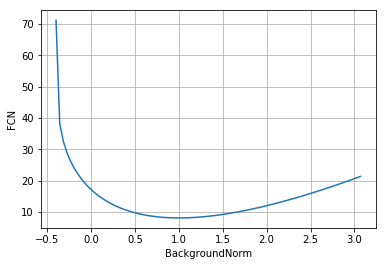

In [32]:
minimiser.draw_profile('BackgroundNorm')

(array([ -2.84012481e+00,  -2.74233780e+00,  -2.64455079e+00,
         -2.54676377e+00,  -2.44897676e+00,  -2.35118975e+00,
         -2.25340273e+00,  -2.15561572e+00,  -2.05782871e+00,
         -1.96004169e+00,  -1.86225468e+00,  -1.76446767e+00,
         -1.66668066e+00,  -1.56889364e+00,  -1.47110663e+00,
         -1.37331962e+00,  -1.27553260e+00,  -1.17774559e+00,
         -1.07995858e+00,  -9.82171565e-01,  -8.84384552e-01,
         -7.86597539e-01,  -6.88810526e-01,  -5.91023514e-01,
         -4.93236501e-01,  -3.95449488e-01,  -2.97662475e-01,
         -1.99875462e-01,  -1.02088449e-01,  -4.30143592e-03,
          9.34855770e-02,   1.91272590e-01,   2.89059603e-01,
          3.86846616e-01,   4.84633629e-01,   5.82420642e-01,
          6.80207655e-01,   7.77994668e-01,   8.75781680e-01,
          9.73568693e-01,   1.07135571e+00,   1.16914272e+00,
          1.26692973e+00,   1.36471675e+00,   1.46250376e+00,
          1.56029077e+00,   1.65807778e+00,   1.75586480e+00,
        

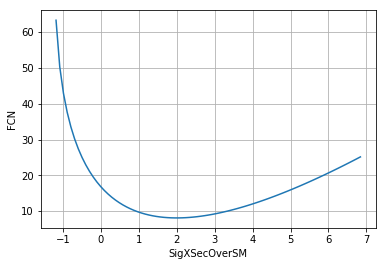

In [33]:
minimiser.draw_profile('SigXSecOverSM')

## large histograms

In [34]:
hist_sig = np.linspace(1,100, 100)
hist_bkg = np.ones(100)*100

In [35]:
print np.flip(hist_sig,0)

[ 100.   99.   98.   97.   96.   95.   94.   93.   92.   91.   90.   89.
   88.   87.   86.   85.   84.   83.   82.   81.   80.   79.   78.   77.
   76.   75.   74.   73.   72.   71.   70.   69.   68.   67.   66.   65.
   64.   63.   62.   61.   60.   59.   58.   57.   56.   55.   54.   53.
   52.   51.   50.   49.   48.   47.   46.   45.   44.   43.   42.   41.
   40.   39.   38.   37.   36.   35.   34.   33.   32.   31.   30.   29.
   28.   27.   26.   25.   24.   23.   22.   21.   20.   19.   18.   17.
   16.   15.   14.   13.   12.   11.   10.    9.    8.    7.    6.    5.
    4.    3.    2.    1.]


In [36]:
m4 = HistiModel('newmodel')
signal = HistiSample('signal')
binedges = np.linspace(0,100, 101)
signal.SetHisto((hist_sig,binedges))
signal.AddNorm("SigXSecOverSM",1.0,0,3)
background = HistiSample('background')
background.SetHisto((hist_bkg, binedges))
#background.AddNorm("BackgroundNorm",1.,0,100)
#background.AddOverallSys("NormSystUncertainty",.9,1.1)
h_up = hist_bkg + np.flip(hist_sig, 0)*.5
h_down = hist_bkg - np.flip(hist_sig, 0)*.5
background.AddHistoSys("HistoSystUncertainty",h_down,h_up)
chan = HistiChannel("SR")
chan.AddSample(signal)
chan.AddSample(background)

data = hist_sig*2 +hist_bkg

chan.SetData(data)
m4.AddChannel(chan)

blh = BinnedLH(m4, bound=(0,101))
params = m4.Parameters()

funcpos [array([0, 1]), array([0, 2])]


In [37]:
minimiser = Minuit(blh, **params)
minimiser.migrad()
minimiser.hesse()
minimiser.minos()

/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter SigXSecOverSM is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/Users/vince/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter HistoSystUncertainty is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.


FCN = 354.468988782 
 TOTAL NCALL = 81 
 NCALLS = 81 
 
 
 EDM = 5.0723566922e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99981,0.0448621,0,0,0.0,3.0,
2,HistoSystUncertainty,-0.000568582,0.0806946,0,0,-50.0,50.0,


+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,SigXSecOverSM,1.99981,0.0447196,0,0,0.0,3.0,
2,HistoSystUncertainty,-0.000568582,0.0807193,0,0,-50.0,50.0,


+,SigXSecOverSM,HistoSystUncertainty
SigXSecOverSM,1.00,0.53
HistoSystUncertainty,0.53,1.00


Error,-0.0440774156866,0.0429949024873
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


Error,-0.0793408461664,0.051737408001
Valid,True,True
At Limit,False,False
Max FCN,False,False
New Min,False,False


{'HistoSystUncertainty': {'lower_new_min': False, 'upper': 0.051737408000980596, 'lower': -0.07934084616635333, 'at_lower_limit': False, 'min': -0.0005685816294160873, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 24},
 'SigXSecOverSM': {'lower_new_min': False, 'upper': 0.042994902487271044, 'lower': -0.04407741568662184, 'at_lower_limit': False, 'min': 1.999807984487674, 'at_lower_max_fcn': False, 'is_valid': True, 'upper_new_min': False, 'at_upper_limit': False, 'lower_valid': True, 'upper_valid': True, 'at_upper_max_fcn': False, 'nfcn': 27}}

(array([ 1.91036875,  1.9121756 ,  1.91398246,  1.91578931,  1.91759616,
         1.91940302,  1.92120987,  1.92301672,  1.92482358,  1.92663043,
         1.92843728,  1.93024414,  1.93205099,  1.93385784,  1.9356647 ,
         1.93747155,  1.9392784 ,  1.94108525,  1.94289211,  1.94469896,
         1.94650581,  1.94831267,  1.95011952,  1.95192637,  1.95373323,
         1.95554008,  1.95734693,  1.95915379,  1.96096064,  1.96276749,
         1.96457435,  1.9663812 ,  1.96818805,  1.96999491,  1.97180176,
         1.97360861,  1.97541547,  1.97722232,  1.97902917,  1.98083603,
         1.98264288,  1.98444973,  1.98625659,  1.98806344,  1.98987029,
         1.99167714,  1.993484  ,  1.99529085,  1.9970977 ,  1.99890456,
         2.00071141,  2.00251826,  2.00432512,  2.00613197,  2.00793882,
         2.00974568,  2.01155253,  2.01335938,  2.01516624,  2.01697309,
         2.01877994,  2.0205868 ,  2.02239365,  2.0242005 ,  2.02600736,
         2.02781421,  2.02962106,  2.03142792,  2.0

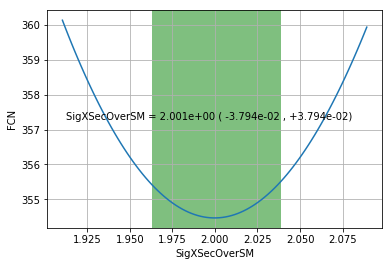

In [38]:
minimiser.draw_profile('SigXSecOverSM')

Help on built-in function draw_mncontour:

draw_mncontour(...)
    Minuit.draw_mncontour(self, x, y, bins=100, nsigma=2, numpoints=20, sigma_res=4)
    Draw minos contour.
    
            **Arguments:**
    
                - **x**, **y** parameter name
    
                - **bins** number of bin in contour grid.
    
                - **nsigma** number of sigma contour to draw
    
                - **numpoints** number of points to calculate for each contour
    
                - **sigma_res** number of sigma level to calculate MnContours.
                  Default 4.
    
            **Returns:**
    
                x, y, gridvalue, contour
    
                gridvalue is interorlated nsigma



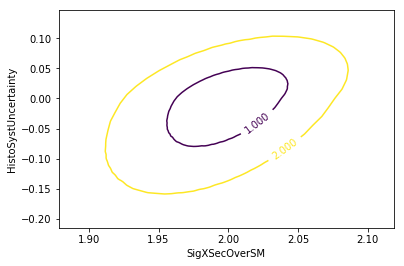

In [39]:
minimiser.draw_mncontour('SigXSecOverSM',"HistoSystUncertainty", numpoints=60, bins=200)
help(minimiser.draw_mncontour)